In [75]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [76]:
np.random.seed(59)
pos = np.random.randint(0, 10, (10, 2))
nodes = {x: y for x, y in enumerate(pos)}

In [77]:
from scipy.spatial.distance import cdist

In [78]:
distances = cdist(pos, pos, metric="euclidean")
edges = []
for i, row in enumerate(distances):
    closest = row.argpartition(3)[:3]
    closest = closest[closest!=i]
    for c in closest:
        edges.append([i, c])
print(edges)

[[0, 8], [0, 7], [1, 4], [1, 6], [2, 3], [2, 9], [3, 2], [3, 9], [4, 1], [4, 6], [5, 0], [5, 8], [6, 9], [6, 7], [7, 0], [7, 8], [8, 7], [8, 0], [9, 8], [9, 7]]


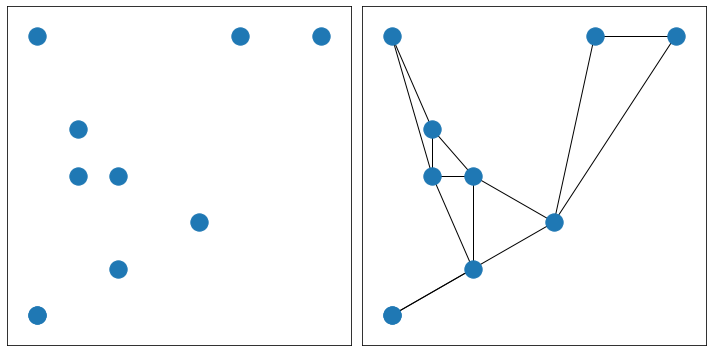

In [162]:
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

nx.draw_networkx_nodes(g, pos, ax=ax1)
nx.draw_networkx_edges(g, pos, ax=ax1, edge_color="w")
nx.draw_networkx_nodes(g, pos, ax=ax2)
nx.draw_networkx_edges(g, pos, ax=ax2)
plt.tight_layout()
plt.savefig("knnconstructionexample")

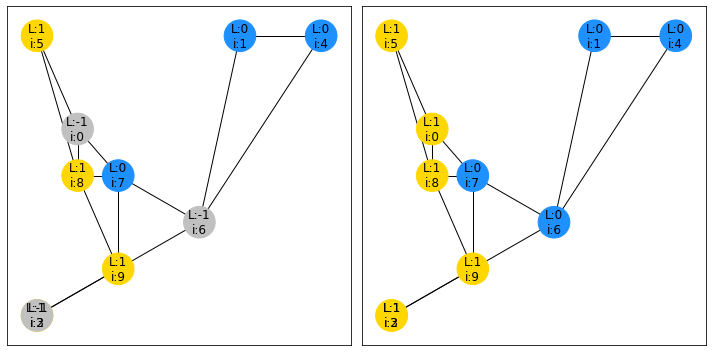

In [173]:
np.random.seed(7)
labels = np.random.randint(-1, 2, 10)
nx_labels = {x: f"L:{y}\ni:{x}" for x, y in enumerate(labels)}
colors = ["silver", "dodgerblue", "gold"]
nx_colors = [colors[y+1] for y in labels]


new_labels = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]
nx_new_labels = {x: f"L:{y}\ni:{x}" for x,y in enumerate(new_labels)}
nx_new_colors = [colors[y+1] for y in new_labels]



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

nx.draw_networkx_nodes(g, pos, node_color=nx_colors, ax=ax1, node_size=1000)
nx.draw_networkx_labels(g, pos, labels=nx_labels, ax=ax1)
nx.draw_networkx_edges(g, pos, ax=ax1)

nx.draw_networkx_nodes(g, pos, node_color=nx_new_colors, ax=ax2, node_size=1000)
nx.draw_networkx_labels(g, pos, labels=nx_new_labels, ax=ax2)
nx.draw_networkx_edges(g, pos, ax=ax2)

plt.tight_layout()
plt.savefig("labelpropagationexample")

In [175]:
import array_to_latex as a2l

In [186]:
W = np.zeros((10, 10), dtype=np.int8)
for p1, p2 in edges:
    W[p1, p2] = 1
    W[p2, p1] = 1

print(W)

a2l.to_clp(W, frmt="{:1.0f}")

[[0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 1 0 0 1 0 1]
 [1 0 0 0 0 0 1 0 1 1]
 [1 0 0 0 0 1 0 1 0 1]
 [0 0 1 1 0 0 1 1 1 0]]


In [190]:
a2l.to_clp(labels.T, frmt="{:1.0f}")